<a href="https://colab.research.google.com/github/NicolasNgo/Projet1-INFO-PROF/blob/main/TD2_Data_Management_%5BCorrection%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TD 2 - Data management [Correction]**

## **A) DataFrame Manipulation**

### **Exercise 1 - Creation of DataFrame from a dictionary**
**Write a Pandas program to create and display a DataFrame from the following dictionary.**

* __Once created, use the name as an index for the DataFrame.__
* __Display the measures of Pierre__
* __Give the overall mean measurement__
* __Give the mean measurement of each center__


```
dict1 = {
  'Names':['Jean','Marie','Joseph','Marthe','Jacob','Marc','Paul','Pierre','Ismael','David','Mathieu'],
  'Measures':[12.5,18.0, 10.0, 13.2, 3.2, 5.7, 12.0, 6.0, 7.0, 14.5, 17.6],
  'Center':['1', '2', '2', '1', '2', '2', '1', '2', '1','2', '1']}

```



### **Correction**

**To create a DataFrame with a dictionary, we just need to pass the dictionary to the pandas' function `DataFrame()`.**

In [1]:
import pandas as pd
dict1 = {
    'Names':['Jean','Marie','Joseph','Marthe','Jacob','Marc','Paul','Pierre','Ismael','David','Mathieu'],
    'Measures':[12.5,18.0, 10.0, 13.2, 3.2, 5.7, 12.0, 6.0, 7.0, 14.5, 17.6],
    'Center':['1', '2', '2', '1', '2', '2', '1', '2', '1','2', '1']
    }

df = pd.DataFrame(dict1)


We set the index with the `set_index` method.

In [2]:
df = df.set_index('Names')
df

,Measures,Center
Names,,
Jean,12.5,1
Marie,18.0,2
Joseph,10.0,2
Marthe,13.2,1
Jacob,3.2,2
Marc,5.7,2
Paul,12.0,1
Pierre,6.0,2
Ismael,7.0,1


We use the `loc` method to select the row named/indexed 'Pierre'.

In [3]:
print('Pierre has a measurement of %.2f.' % df.loc['Pierre'].Measures)

Pierre has a measurement of 6.00.


We use the `mean` method to display the mean value of the Measures column.

In [4]:
print('Patients have a mean measures of %.1f.'% df.Measures.mean())

Patients have a mean measures of 10.9.


In [5]:
df.groupby('Center').mean()

,Measures
Center,
1,12.460000
2,9.566667


## **B) Manipulate DataFrame**



---

### **Exercise 2**

**From the following DataFrame:**
* Display the first 3 rows.
* Display the column age.
* Display the number of rows.
* Display the proportion of male and female patients.
* Display the 'id' of the youngest and oldest patient along with the corresponding ages.
* Display the patients over 40 years old.
* Compute the BMI of each patients and add a new column with this value in your DataFrame. The value would be an integer.
* Create a new column from BMI with categorical version of BMI. 
* Display the number of patients by category of BMI
* Give the mean age of each category.

 

```
df = pd.DataFrame({
  'id': ['085','086','087','088','089','090','091','092','093','094'],
  'age':[19,42,25,58,36,74,65,20,47,32],
  'weight':['50', '46', '60', '103','75','68','82', '96','74', '113'],
  'height':[158, 174, 195, 169, 158, 201, 189, 163, 184, 173],
  'sex':['F','F','F','M','M','F','M','F','F','M']
})

```
**Note:** The Body Mass Index can be calculated with the formula:

$$
BMI = \frac{Weight}{Height^2}
$$
with the $Height$ in meters and the $Weight$ in kg



### **Correction**

In [6]:
import pandas as pd

# Creation of the DataFrame
df = pd.DataFrame({
  'id': ['085','086','087','088','089','090','091','092','093','094'],
  'age':[19,42,25,58,36,74,65,20,47,32],
  'weight':['50', '46', '60', '103','75','68','82', '96','74', '113'],
  'height':[158, 174, 195, 169, 158, 201, 189, 163, 184, 173],
  'sex':['F','F','F','M','M','F','M','F','F','M'],
})

In [7]:
# Display the first 3 rows
print('The first 3 rows are:\n')
print(df.iloc[:3],'\n')

The first 3 rows are:

    id  age weight  height sex
0  085   19     50     158   F
1  086   42     46     174   F
2  087   25     60     195   F 



In [8]:
# Display the column age
print('The column age:\n')
print(df.age,'\n')

# or
print(df.loc[:,'age'])

# or

print(df.iloc[:,1])

# or
print(df['age'])

The column age:

0    19
1    42
2    25
3    58
4    36
5    74
6    65
7    20
8    47
9    32
Name: age, dtype: int64 

0    19
1    42
2    25
3    58
4    36
5    74
6    65
7    20
8    47
9    32
Name: age, dtype: int64
0    19
1    42
2    25
3    58
4    36
5    74
6    65
7    20
8    47
9    32
Name: age, dtype: int64
0    19
1    42
2    25
3    58
4    36
5    74
6    65
7    20
8    47
9    32
Name: age, dtype: int64


In [9]:
# Display the number of rows
print('There is %i rows.\n' % df.shape[0])

There is 10 rows.



In [10]:
# Display the proportion of male and female
prop = df.groupby('sex').size()/df.shape[0]
print('There is %i%% of female and %i%% of male' % (prop[0]*100, prop[1]*100))

There is 60% of female and 40% of male


In [11]:
# Display the 'id' of the youngest and oldest patient along with the corresponding ages.
print('The youngest patient, id n°%s, has %i years old.' % (df.id[df.age.idxmin()], df.age.min()))
print('The oldest patient, id n°%s, has %i years old' % (df.id[df.age.idxmax()], df.age.max()))

The youngest patient, id n°085, has 19 years old.
The oldest patient, id n°090, has 74 years old


In [12]:
# Display the patients over 40 years old.
df.loc[df['age']>40]

,id,age,weight,height,sex
1,086,42,46,174,F
3,088,58,103,169,M
5,090,74,68,201,F
6,091,65,82,189,M
8,093,47,74,184,F


In [13]:
# Computation of the BMI
df['BMI'] = (df.weight.astype(int)/((df.height/100)**2)).astype('int')
df

,id,age,weight,height,sex,BMI
0,085,19,50,158,F,20
1,086,42,46,174,F,15
2,087,25,60,195,F,15
3,088,58,103,169,M,36
4,089,36,75,158,M,30
5,090,74,68,201,F,16
6,091,65,82,189,M,22
7,092,20,96,163,F,36
8,093,47,74,184,F,21
9,094,32,113,173,M,37


In [14]:
# BMI as a categorical column
df['BMI_cat'] = pd.cut(df.BMI, bins = [10, 18, 25, 30, 35, 40, 60],  right = False)
df

,id,age,weight,height,sex,BMI,BMI_cat
0,085,19,50,158,F,20,"[18, 25)"
1,086,42,46,174,F,15,"[10, 18)"
2,087,25,60,195,F,15,"[10, 18)"
3,088,58,103,169,M,36,"[35, 40)"
4,089,36,75,158,M,30,"[30, 35)"
5,090,74,68,201,F,16,"[10, 18)"
6,091,65,82,189,M,22,"[18, 25)"
7,092,20,96,163,F,36,"[35, 40)"
8,093,47,74,184,F,21,"[18, 25)"
9,094,32,113,173,M,37,"[35, 40)"


In [15]:
# Number of patients by category
df["BMI_cat"].value_counts()

[35, 40)    3
[18, 25)    3
[10, 18)    3
[30, 35)    1
[40, 60)    0
[25, 30)    0
Name: BMI_cat, dtype: int64

In [16]:
# Mean age of each category
df.groupby('BMI_cat')['age'].mean()

BMI_cat
[10, 18)    47.000000
[18, 25)    43.666667
[25, 30)          NaN
[30, 35)    36.000000
[35, 40)    36.666667
[40, 60)          NaN
Name: age, dtype: float64

## **C) Date format**

##**Exercise 3**

**For this exercise, we will be using [HortonGeneralHospital.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/00549/HortonGeneralHospital.csv) (https://archive.ics.uci.edu/ml/machine-learning-databases/00549/HortonGeneralHospital.csv) a dataset provided on the _UCI Machine Learning Repository_, .** 

**In this data set we have monthly numbers of transfers from Emergency Room into Critical Care classified in three exclusive categories at Horton General Hospital (Banbury, UK)from November 1999 to May 2011. The three categories are Cardio-respiratory arrest, Respiratory arrest and Hypoglycaemic arrest. You'll also find in this dataset the montly total number of patients entering Emergency Room.**

**Description of variables:**
* **Cardio**: Numbers of transfers from Emergency Room to Cardio-respiratory arrest. 
* **Resp:** Numbers of transfers from Emergency Room to Respiratory arrest.
* **Hypo:** Numbers of transfers from Emergency room to Hypoglycaemic arrest.
* **Adm:** Total number of patients entering Emergency Room.
* **year:** Year of measurement.
* **month:** Month of measurement.

**From this data set we will do some date format manipulations.**

1. **Import the dataset using the url.** (**Hint:** check the `read_csv` pandas' function).
2. **Use the dates as an index**
3. **Give the date with the most admission to Emergency Room.**
4. **How many Hypoglycaemic arrest were recorded for 2004.**
5. **From December 2003 to February 2004, use a time function to give you how many days passed**
6. **Create a new column with a cummulative sum of the Cardio-respiratory arrest** 
7. **Create a new column with a rolling mean (with a 3 month windows) of the admission to Emergency Room and print the result.**




### **Correction**


**Task 1**

To import a file from a url, we use the pandas `read_csv` function with the url as an argument. You can use the `help()` function to display all the available arguments of this function.

In [17]:
import pandas as pd
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: str = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file in

The `sep` and `decimal` arguments are very importants. The `sep` defines what will be the separator between columns of the csv file, `decimal` gives the character to recognize as decimal point. For instance in French we use the coma as a decimal and in England it is the point. A file can be badly imported and generate bad analysis if you are not careful enough. Usually the function automatically detect the `sep` and `decimal` used in a csv file. But mistakes can be done with a .txt file for instance. Whatever the file, it is always a good practice to check the importation by using a `head()` function and check the type of variables of your dataset. 

Another important argument is how does the NaN values are handled. The `na_values` allows you to specified a scalar or a string which should be assumed as NaN (in addition to NA/NaN). For instance a '-' or 'x' could have been used as a NA values but the importation will consider them as valid values. 

`dtypes` allows you to specify the column types with a dictionary. {'<column1>':<typeOfColumn1>,...,'<columnp>':<typeOfColumnp>}.

The `encoding` argument can be useful if some columns contain string with special characters. With the right encoding value, the character will appear correctly in the dataset. 

Finally, the `parse_date` argument allows you to specify how do you want to handle the date column. With a `True` argument, all the index will be parse to a date. You can specify which column you want to sparce with a list and you can also specify if you want to merge to column (of dates) into a new column of date format. This argument is what we are interested by with this exercise. 

In [18]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00549/HortonGeneralHospital.csv"

# Import the dataset
df = pd.read_csv(filepath_or_buffer = url, sep = ',', decimal = '.', index_col = 1, parse_dates = [[5, 6]])
df.head()


,year_month,Cardio,Resp,Hypo,Adm
1,1999-11-01,1,0,0,413
2,1999-12-01,1,0,0,443
3,2000-01-01,1,0,0,378
4,2000-02-01,0,0,0,385
5,2000-03-01,1,0,0,388


**Task 2**

Use the dates as an index.

In [19]:
df = df.set_index("year_month")


In [20]:
df

,Cardio,Resp,Hypo,Adm
year_month,,,,
1999-11-01,1,0,0,413
1999-12-01,1,0,0,443
2000-01-01,1,0,0,378
2000-02-01,0,0,0,385
2000-03-01,1,0,0,388
...,...,...,...,...
2011-01-01,0,0,0,541
2011-02-01,1,0,0,457
2011-03-01,3,0,0,560


**Task 3**: Give the date with the most admission to Emergency center.

To answer this question we need to use the `idxmax()` and `iloc()` methods of Pandas. `idxmax` will give us the index of the row maximizing the value and `iloc` will select the row corresponding to this index.

In [21]:
date_max_adm = df['Adm'].idxmax()
print(date_max_adm)
print('The maximum number of admissions was reached on %s of %i with %i admissions.' % (date_max_adm.month_name(), date_max_adm.year, df.loc[date_max_adm].Adm))

2004-07-01 00:00:00
The maximum number of admissions was reached on July of 2004 with 724 admissions.


**Task 4**
First we need to select all the records of 2004 and then to sum all the 'Hypo' values. 

In [22]:
df.loc['2004', 'Hypo'].sum()

2

In [23]:
Hypo_sum_2004 = df.loc['2004','Hypo'].sum()
print(Hypo_sum_2004)

2


In [24]:
print('On 2004 there was %i hypoglycaemia arrests in total.' % df.loc['2004','Hypo'].sum())

On 2004 there was 2 hypoglycaemia arrests in total.


**Task 5**

We can use operators on dates to calculate the number of days between two dates.

In [25]:
x = (df.loc['2004-02'].index - df.loc['2003-12'].index)
print('Between December 2003 and February 2004, there is %s.' % x.astype(str)[0])

Between December 2003 and February 2004, there is 62 days.


**Task 6** 
Do a yearly summary of each column. We will use the `groupby` function with a year step on the index and the `agg` method to apply a list of function on each column. Every column is integer so we will compute the size, min, median, max, mean and standard deviation of each column for each year.

In [27]:
df.groupby(df.index.year).agg(['size','min','median','max','mean','std'])

Cardio                 ...    Adm                            
             size min median max  ... median  max        mean        std
year_month                        ...                                   
1999            2   1    1.0   1  ...  428.0  443  428.000000  21.213203
2000           12   0    1.0   3  ...  410.0  453  410.583333  20.624162
2001           12   0    0.0   2  ...  449.5  499  451.833333  23.412636
2002           12   0    1.5   3  ...  512.0  558  503.916667  33.789343
2003           12   0    1.0   3  ...  554.0  644  566.250000  48.917602
2004           12   0    1.0   3  ...  659.5  724  648.833333  57.620756
2005           12   0    1.0   2  ...  566.0  635  569.166667  42.626994
2006           12   0    1.0   3  ...  537.5  579  539.333333  25.952170
2007           12   0    0.5   2  ...  545.0  593  543.583333  27.291218
2008           12   0    0.5   3  ...  526.5  637  529.000000  43.734738
2009           12   0    1.0   2  ...  587.5  656  583.750000  40.582408
2010           12   0    1.0   2  ...  577.0  609  575.583333  28.576718
2011            5   0    1.0   3  ...  514.0  560  489.000000  75.581082

[13 rows x 24 columns]

**Task 7**
We will use the `cumsum` function

In [28]:
# Now we will create the new column
df.head()

# First way
df['CumSumCardio'] = df.Cardio.cumsum()

# Second way
df['CumsumCardio'] = pd.DataFrame.cumsum(df['Cardio'])

In [29]:
df.head()

,Cardio,Resp,Hypo,Adm,CumSumCardio,CumsumCardio
year_month,,,,,,
1999-11-01,1,0,0,413,1,1
1999-12-01,1,0,0,443,2,2
2000-01-01,1,0,0,378,3,3
2000-02-01,0,0,0,385,3,3
2000-03-01,1,0,0,388,4,4


**Task 8**
We use the `rolling` function and the `.plot` method.

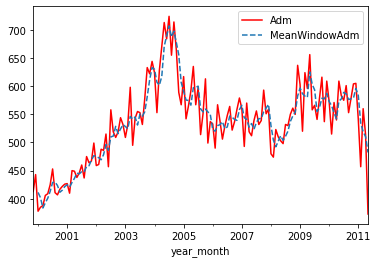

In [30]:
df['MeanWindowAdm'] = df['Adm'].rolling(3).mean()
df
df[['Adm','MeanWindowAdm']].plot(style = ['-r','--'], )